# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [5]:
df=pd.read_csv('patient_data.csv')
df.head()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [6]:
# changing column named "C" to 'Gender'
df.rename(columns={"C":"Gender"},inplace=True)
df.head()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [7]:
df.shape

(1825, 14)

In [8]:
df.info()# we can see all columns are object(we have to convert them to numerical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [9]:
# first seeing the unique values in each feature(to check if there is any anamoly)
for col in df.columns:
  print(f"Unique values in {col}: ")
  print(df[col].unique())


Unique values in Gender: 
['Male' 'Female']
Unique values in Age: 
['18-34' '35-50' '51-64' '65+']
Unique values in History: 
['Yes' 'No']
Unique values in Patient: 
['No' 'Yes']
Unique values in TakeMedication: 
['No' 'Yes ' 'Yes']
Unique values in Severity: 
['Mild' 'Sever' 'Moderate']
Unique values in BreathShortness: 
['No' 'Yes']
Unique values in VisualChanges: 
['No' 'Yes']
Unique values in NoseBleeding: 
['No ' 'No' 'Yes']
Unique values in Whendiagnoused: 
['<1 Year' '1 - 5 Years' '>5 Years']
Unique values in Systolic: 
['111 - 120' '121- 130' '130+' '100+' '121 - 130']
Unique values in Diastolic: 
['81 - 90' '91 - 100' '100+' '130+' '70 - 80']
Unique values in ControlledDiet: 
['No' 'Yes']
Unique values in Stages: 
['HYPERTENSION (Stage-1)' 'HYPERTENSION (Stage-2)' 'HYPERTENSIVE CRISIS'
 'HYPERTENSION (Stage-2).' 'HYPERTENSIVE CRISI' 'NORMAL']


# Conclusion after checking unique values:

*   TakeMedication column is not Ok(['No' 'Yes ' 'Yes'])
*   NoseBleeding column is not ok(['No ' 'No' 'Yes'])


*   Systolic column is not Ok(['111 - 120' '121- 130' '130+' '100+' '121 - 130'])
*   Stage(Target variable) is not Ok(['HYPERTENSION (Stage-1)' 'HYPERTENSION (Stage-2)' 'HYPERTENSIVE CRISIS'
 'HYPERTENSION (Stage-2).' 'HYPERTENSIVE CRISI' 'NORMAL'])





In [10]:
# doing essential changes:
df['TakeMedication'].replace(to_replace={'Yes ':'Yes'},inplace=True)
df['TakeMedication'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df['NoseBleeding'].replace(to_replace={'No ':'No'},inplace=True)
df.NoseBleeding.unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df['Systolic'].replace(to_replace={'121- 130':'121 - 130'},inplace=True)
df['Systolic'].unique()

array(['111 - 120', '121 - 130', '130+', '100+'], dtype=object)

In [13]:
df['Stages'].replace(to_replace={'HYPERTENSIVE CRISI':'HYPERTENSIVE CRISIS', 'HYPERTENSION (Stage-2).':'HYPERTENSION (Stage-2)'},inplace=True)
df.Stages.unique()

array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'NORMAL'], dtype=object)

# Handling Missing Values


In [14]:
df.isnull().sum() # No missing value data is good to go

,0
Gender,0
Age,0
History,0
Patient,0
TakeMedication,0
Severity,0
BreathShortness,0
VisualChanges,0
NoseBleeding,0
Whendiagnoused,0


In [15]:
df['Stages'].value_counts()

,count
Stages,
HYPERTENSION (Stage-1),648
HYPERTENSION (Stage-2),600
NORMAL,336
HYPERTENSIVE CRISIS,241


# Handling Categorical Values


In [16]:
from sklearn.preprocessing import LabelEncoder
import pickle

label_encoders = {}
target_encoder = LabelEncoder()

# Encoding X columns (all except 'Stages')
for col in df.columns:
    if col != 'Stages' and df[col].dtype == 'object':
        df[col] = df[col].str.strip()  # clean strings
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encoding target column separately
df['Stages'] = df['Stages'].str.strip()
df['Stages'] = target_encoder.fit_transform(df['Stages'])

# Saving encoders
with open('encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

with open('stage_encoder.pkl', 'wb') as f:
    pickle.dump(target_encoder, f)

In [17]:
df

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,1,0,1,0,0,0,0,0,0,1,1,3,0,0
1,0,0,1,0,0,0,0,0,0,1,1,3,0,0
2,1,1,1,0,0,0,0,0,0,1,1,3,0,0
3,0,1,1,0,0,0,0,0,0,1,1,3,0,0
4,1,2,1,0,0,0,0,0,0,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,1,1,0,0,2,0,0,0,2,1,2,0,3
1821,1,2,1,0,0,2,0,0,0,2,1,2,0,3
1822,0,2,1,0,0,2,0,0,0,2,1,2,0,3
1823,1,3,1,0,0,2,0,0,0,2,1,2,0,3


# EDA

In [18]:
# to see the descriptive statistics

df.describe()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,0.499726,1.441096,0.907945,0.460822,0.592329,1.013151,0.465205,0.484932,0.243836,1.026301,1.572603,2.717808,0.460822,1.145205
std,0.500137,1.098723,0.289183,0.498599,0.491536,0.786287,0.498925,0.499910,0.429512,0.810680,0.712756,1.256490,0.498599,1.096876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,1.000000,3.000000


In [19]:
# visualising the data

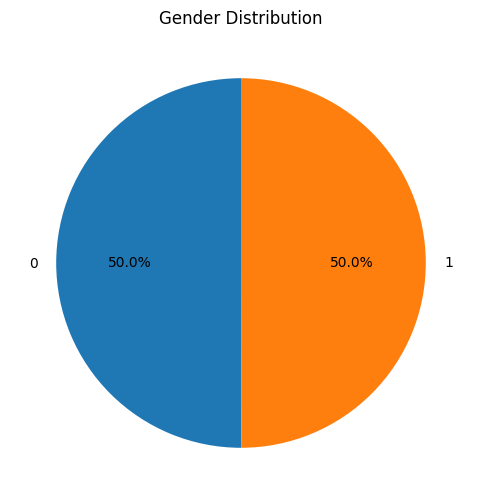

In [20]:
gender_counts=df['Gender'].value_counts()

#Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Gender Distribution')
plt.show()

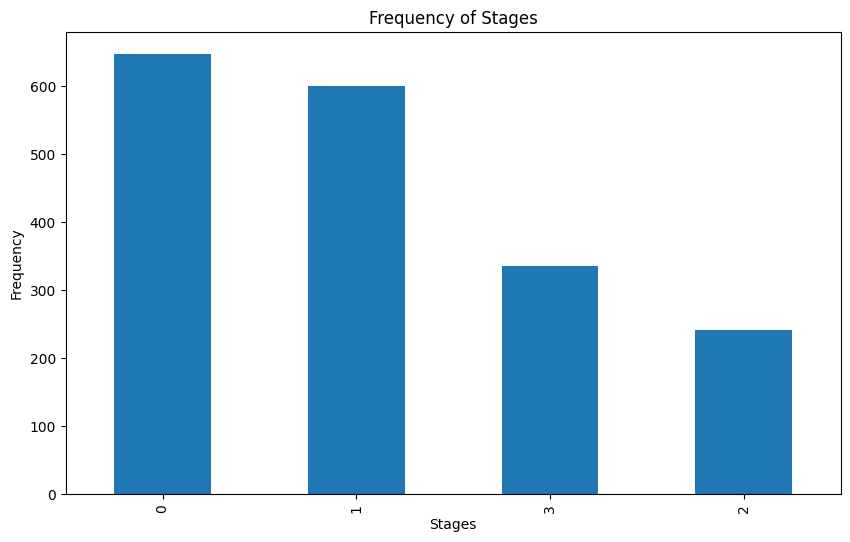

In [21]:
frequency=df['Stages'].value_counts()

frequency.plot(kind='bar',figsize=(10,6))
plt.title('Frequency of Stages')
plt.xlabel('Stages')
plt.ylabel('Frequency')
plt.show()

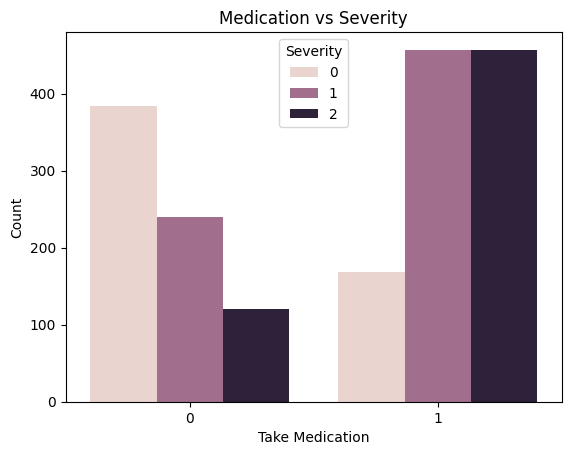

In [22]:
sns.countplot(x='TakeMedication', hue='Severity',data=df)
plt.title('Medication vs Severity')
plt.xlabel('Take Medication')
plt.ylabel('Count')
plt.show()

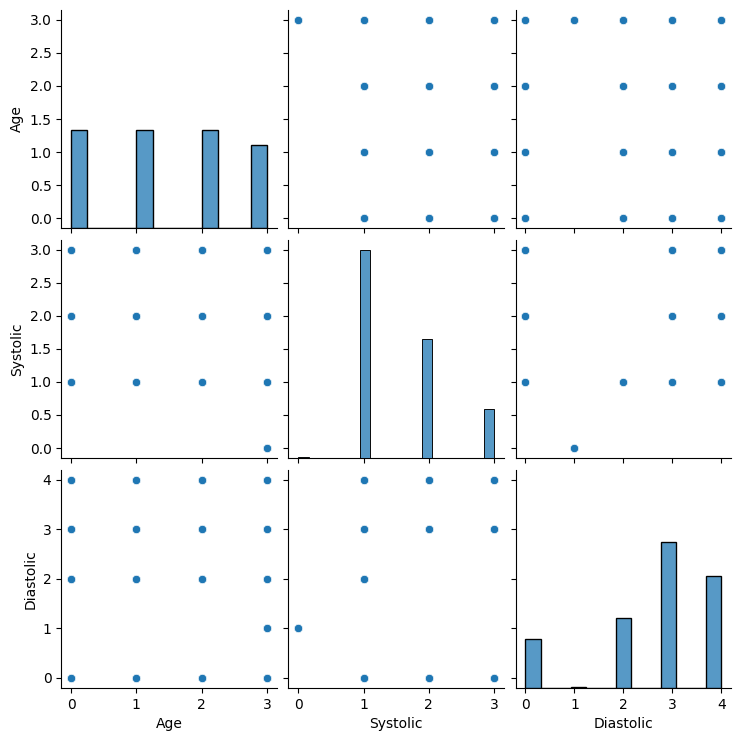

In [23]:
sns.pairplot(df[['Age','Systolic','Diastolic']])
plt.show()

# TRAIN-TEST-SPLIT

In [24]:
X=df.drop('Stages',axis=1)
y=df['Stages']

In [25]:
X

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
0,1,0,1,0,0,0,0,0,0,1,1,3,0
1,0,0,1,0,0,0,0,0,0,1,1,3,0
2,1,1,1,0,0,0,0,0,0,1,1,3,0
3,0,1,1,0,0,0,0,0,0,1,1,3,0
4,1,2,1,0,0,0,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,1,1,0,0,2,0,0,0,2,1,2,0
1821,1,2,1,0,0,2,0,0,0,2,1,2,0
1822,0,2,1,0,0,2,0,0,0,2,1,2,0
1823,1,3,1,0,0,2,0,0,0,2,1,2,0


In [26]:
y

,Stages
0,0
1,0
2,0
3,0
4,0
...,...
1820,3
1821,3
1822,3
1823,3


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

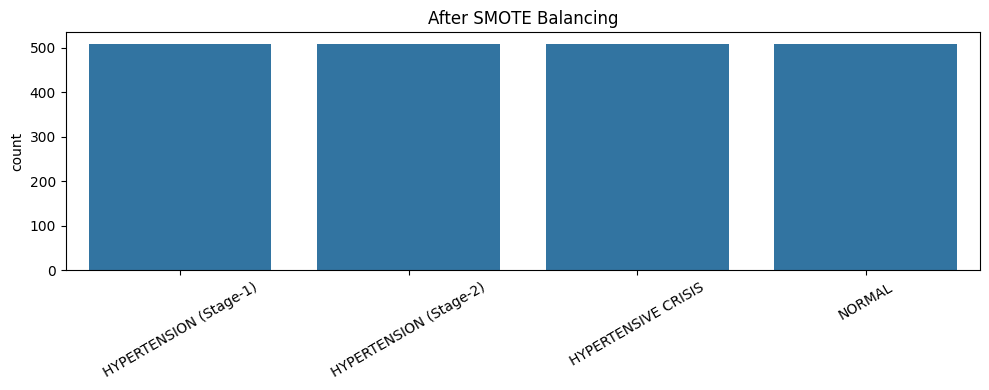

In [28]:
from imblearn.over_sampling import SMOTE

# SMOTE balancing(Handling Imbalanced Data)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Visualizing class distribution after balancing
decoded_y_res = target_encoder.inverse_transform(y_train_res)
plt.figure(figsize=(10, 4))
sns.countplot(x=decoded_y_res, order=target_encoder.classes_)
plt.title("After SMOTE Balancing")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# MODEL TRAINING
*   I am using Custom Bagging(Ensemble Technique) Classifier
*   using algorithms like: Logistic Regression, Random Forest, Decision Tree, Gaussian Naives Bayes and Multinomial Naive Bayes

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier

In [30]:
pipeline= Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('scaling',StandardScaler())])

In [31]:
preprocessor = ColumnTransformer(transformers=[('num_pipeline', pipeline, X.columns)])# as all cols are numerical


In [32]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [33]:
# using multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [34]:
models={'Logistic Regression':LogisticRegression(),
        'Random Forest Classifier':RandomForestClassifier(),
        'Decision Tree Classifier':DecisionTreeClassifier(),
        'GaussianNB' :GaussianNB(),
        'MultinomialNB ':MultinomialNB(),
        'support vector machine' :SVC(),
        'Decision Tree Classifier':DecisionTreeClassifier(),
        }


models

{'Logistic Regression': LogisticRegression(),
 'Random Forest Classifier': RandomForestClassifier(),
 'Decision Tree Classifier': DecisionTreeClassifier(),
 'GaussianNB': GaussianNB(),
 'MultinomialNB ': MultinomialNB(),
 'support vector machine': SVC()}

In [35]:
def model_train_eval(X_train, y_train, X_test, y_test, models):
    evaluation = {}
    for name, model in models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            evaluation[name] = accuracy_score(y_test, y_pred)
        except ValueError as e:          # catches the NB error (or any other)
            print(f"⚠️  Skipped {name}: {e}")
            evaluation[name] = None
    return evaluation

results = model_train_eval(X_train, y_train, X_test, y_test, models)
results

⚠️  Skipped MultinomialNB : Negative values in data passed to MultinomialNB (input X).


{'Logistic Regression': 0.9863013698630136,
 'Random Forest Classifier': 1.0,
 'Decision Tree Classifier': 1.0,
 'GaussianNB': 0.8904109589041096,
 'MultinomialNB ': None,
 'support vector machine': 0.9863013698630136}

# We will use Random Forest Classifier as it is giving 100% accuracy

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)


In [37]:
# using gridsearchCV doing Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
params={'max_depth':[1, 2, 3,5,10,None],
        'n_estimators':[50, 100,200,300],
        'criterion':['gini','entropy']}

In [38]:
clf=RandomizedSearchCV(rf,param_distributions=params,cv=5,n_iter=10,verbose=3)

In [39]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.880 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.890 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.890 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.884 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.856 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=1.000 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=1.000 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=1.000 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=1.000 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=1.000 total time=   0.4s
[CV 

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 5, 10, None],
                                        'n_estimators': [50, 100, 200, 300]},
                   verbose=3)

In [40]:
clf.best_params_

{'n_estimators': 200, 'max_depth': 10, 'criterion': 'entropy'}

In [41]:
clf.best_score_

np.float64(1.0)

In [42]:
clf=clf.best_estimator_

In [43]:
clf

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=200, random_state=42)

In [44]:

pickle.dump(clf,open('model.pkl','wb'))


In [45]:
df.Gender

,Gender
0,1
1,0
2,1
3,0
4,1
...,...
1820,0
1821,1
1822,0
1823,1


In [46]:
df.Age # 18-34=0, 35-50=1

,Age
0,0
1,0
2,1
3,1
4,2
...,...
1820,1
1821,2
1822,2
1823,3


In [47]:
df.Systolic.sample(15)

,Systolic
1801,1
69,1
1333,3
1592,1
1235,2
1125,1
672,2
406,3
1681,1
1497,1


In [48]:
df.Stages.sample(10)

,Stages
755,0
1278,0
1256,0
1435,0
490,1
1643,3
873,1
1181,0
652,1
1565,3
